In [7]:
import pandas as pd

covid = pd.read_csv('owid-covid-data.csv')
covid.columns
covid.head()
covid.isnull().sum()

iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64

In [32]:
covid.head()

The population column is present.


In [13]:
columns_to_keep = ["date", "location", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]
covid_filtered = covid[columns_to_keep]

print (covid_filtered)

              date     location  total_cases  total_deaths  new_cases  \
0       2020-01-03  Afghanistan          NaN           NaN        0.0   
1       2020-01-04  Afghanistan          NaN           NaN        0.0   
2       2020-01-05  Afghanistan          NaN           NaN        0.0   
3       2020-01-06  Afghanistan          NaN           NaN        0.0   
4       2020-01-07  Afghanistan          NaN           NaN        0.0   
...            ...          ...          ...           ...        ...   
302507  2023-04-08     Zimbabwe     264578.0        5684.0        2.0   
302508  2023-04-09     Zimbabwe     264582.0        5684.0        4.0   
302509  2023-04-10     Zimbabwe     264584.0        5684.0        2.0   
302510  2023-04-11     Zimbabwe     264584.0        5684.0        0.0   
302511  2023-04-12     Zimbabwe     264584.0        5684.0        0.0   

        new_deaths  total_vaccinations  
0              0.0                 NaN  
1              0.0                 NaN  


In [15]:
countries_of_interest = ["Kenya", "United States", "India"]

covid_filtered = covid[covid["location"].isin(countries_of_interest)][columns_to_keep]



In [16]:
# Show first few rows of the filtered data
print(covid_filtered.head())


              date location  total_cases  total_deaths  new_cases  new_deaths  \
120683  2020-01-03    India          NaN           NaN        0.0         0.0   
120684  2020-01-04    India          NaN           NaN        0.0         0.0   
120685  2020-01-05    India          NaN           NaN        0.0         0.0   
120686  2020-01-06    India          NaN           NaN        0.0         0.0   
120687  2020-01-07    India          NaN           NaN        0.0         0.0   

        total_vaccinations  
120683                 NaN  
120684                 NaN  
120685                 NaN  
120686                 NaN  
120687                 NaN  


In [17]:
# Show all unique countries in the filtered data
print(covid_filtered["location"].unique())


['India' 'Kenya' 'United States']


In [19]:
critical_columns = [
    'date', 'location', 'total_cases', 'total_deaths',
    'new_cases', 'new_deaths', 'total_vaccinations'
]

covid_filtered = covid_filtered.dropna(subset=critical_columns)


In [20]:
 print(covid_filtered)

              date       location  total_cases  total_deaths  new_cases  \
121061  2021-01-15          India   10527683.0      151918.0    15590.0   
121062  2021-01-16          India   10542841.0      152093.0    15158.0   
121063  2021-01-17          India   10557985.0      152274.0    15144.0   
121064  2021-01-18          India   10571773.0      152419.0    13788.0   
121065  2021-01-19          India   10581837.0      152556.0    10064.0   
...            ...            ...          ...           ...        ...   
285850  2023-03-31  United States  102697566.0     1117054.0        0.0   
285851  2023-04-01  United States  102873924.0     1118800.0   176358.0   
285852  2023-04-02  United States  102873924.0     1118800.0        0.0   
285853  2023-04-03  United States  102873924.0     1118800.0        0.0   
285854  2023-04-04  United States  102873924.0     1118800.0        0.0   

        new_deaths  total_vaccinations  
121061       191.0                 0.0  
121062       175.

In [21]:
covid_filtered['date'] = pd.to_datetime(covid_filtered['date'])

print(covid_filtered['date'].dtype)


datetime64[ns]


In [22]:
covid_filtered = covid_filtered.fillna({
    'total_cases': 0,
    'total_deaths': 0,
    'new_cases': 0,
    'new_deaths': 0,
    'total_vaccinations': 0
})
 

In [23]:
print(covid_filtered)

             date       location  total_cases  total_deaths  new_cases  \
121061 2021-01-15          India   10527683.0      151918.0    15590.0   
121062 2021-01-16          India   10542841.0      152093.0    15158.0   
121063 2021-01-17          India   10557985.0      152274.0    15144.0   
121064 2021-01-18          India   10571773.0      152419.0    13788.0   
121065 2021-01-19          India   10581837.0      152556.0    10064.0   
...           ...            ...          ...           ...        ...   
285850 2023-03-31  United States  102697566.0     1117054.0        0.0   
285851 2023-04-01  United States  102873924.0     1118800.0   176358.0   
285852 2023-04-02  United States  102873924.0     1118800.0        0.0   
285853 2023-04-03  United States  102873924.0     1118800.0        0.0   
285854 2023-04-04  United States  102873924.0     1118800.0        0.0   

        new_deaths  total_vaccinations  
121061       191.0                 0.0  
121062       175.0           

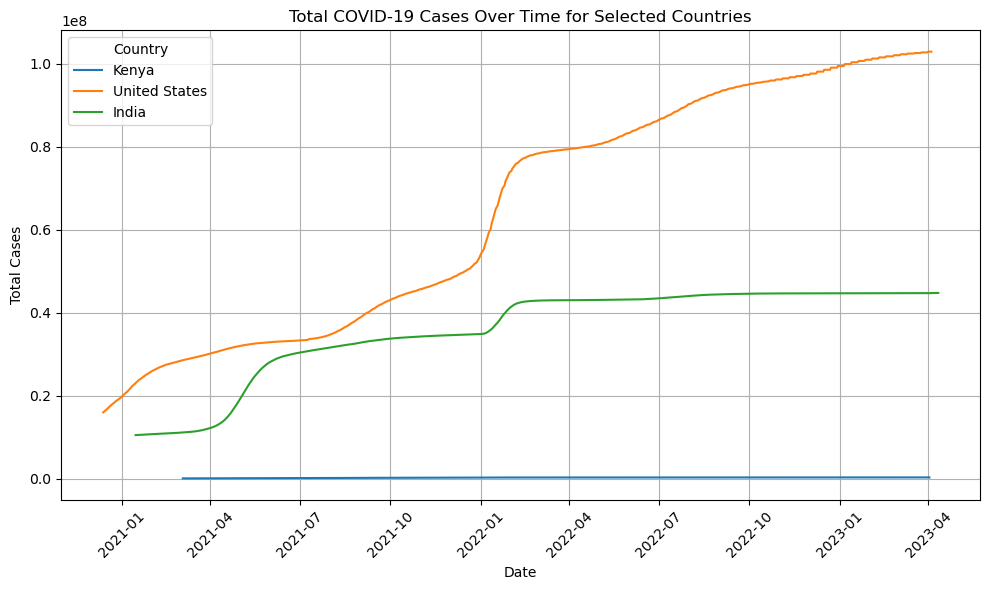

In [24]:
import matplotlib.pyplot as plt

# List of selected countries
selected_countries = ["Kenya", "United States", "India"]   

# Plot total cases over time for selected countries
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = covid_filtered[covid_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Customize plot
plt.title('Total COVID-19 Cases Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


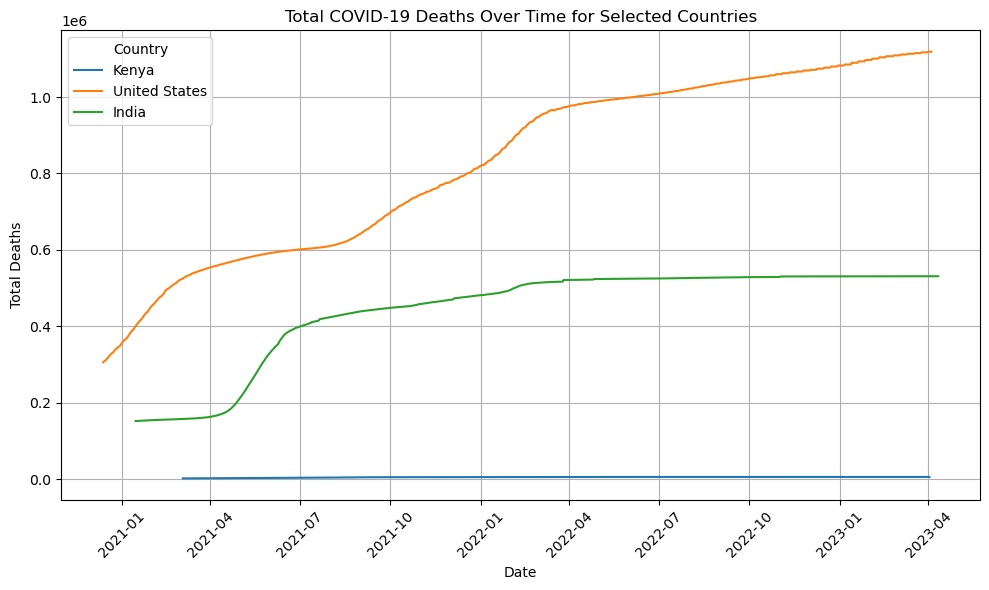

In [25]:
import matplotlib.pyplot as plt

# List of selected countries
selected_countries = ["Kenya", "United States", "India"]   
# Plot total deaths over time for selected countries
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = covid_filtered[covid_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# Customize plot
plt.title('Total COVID-19 Deaths Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


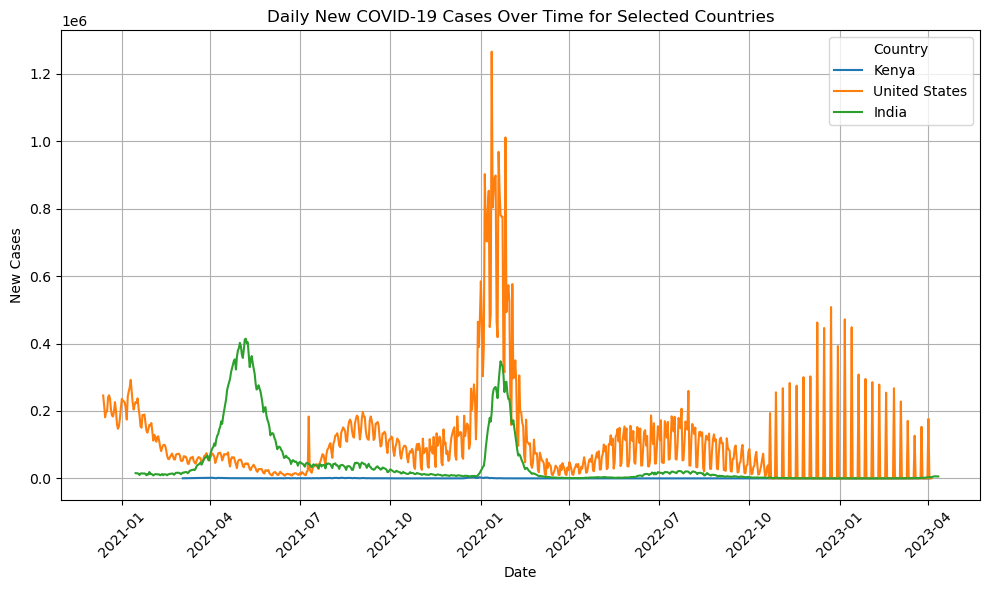

In [26]:
import matplotlib.pyplot as plt

# List of selected countries
selected_countries = ['Kenya', 'United States', 'India']

# Plot daily new cases over time for selected countries
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = covid_filtered[covid_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

# Customize plot
plt.title('Daily New COVID-19 Cases Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [27]:
# Calculate death rate as total_deaths / total_cases
covid_filtered['death_rate'] = covid_filtered['total_deaths'] / covid_filtered['total_cases']

# Optional: Handle any divisions by zero or missing values (if total_cases is zero or NaN)
covid_filtered['death_rate'] = covid_filtered['death_rate'].fillna(0)

# Verify the new column
print(covid_filtered[['location', 'date', 'total_deaths', 'total_cases', 'death_rate']].head())


       location       date  total_deaths  total_cases  death_rate
121061    India 2021-01-15      151918.0   10527683.0    0.014430
121062    India 2021-01-16      152093.0   10542841.0    0.014426
121063    India 2021-01-17      152274.0   10557985.0    0.014423
121064    India 2021-01-18      152419.0   10571773.0    0.014418
121065    India 2021-01-19      152556.0   10581837.0    0.014417


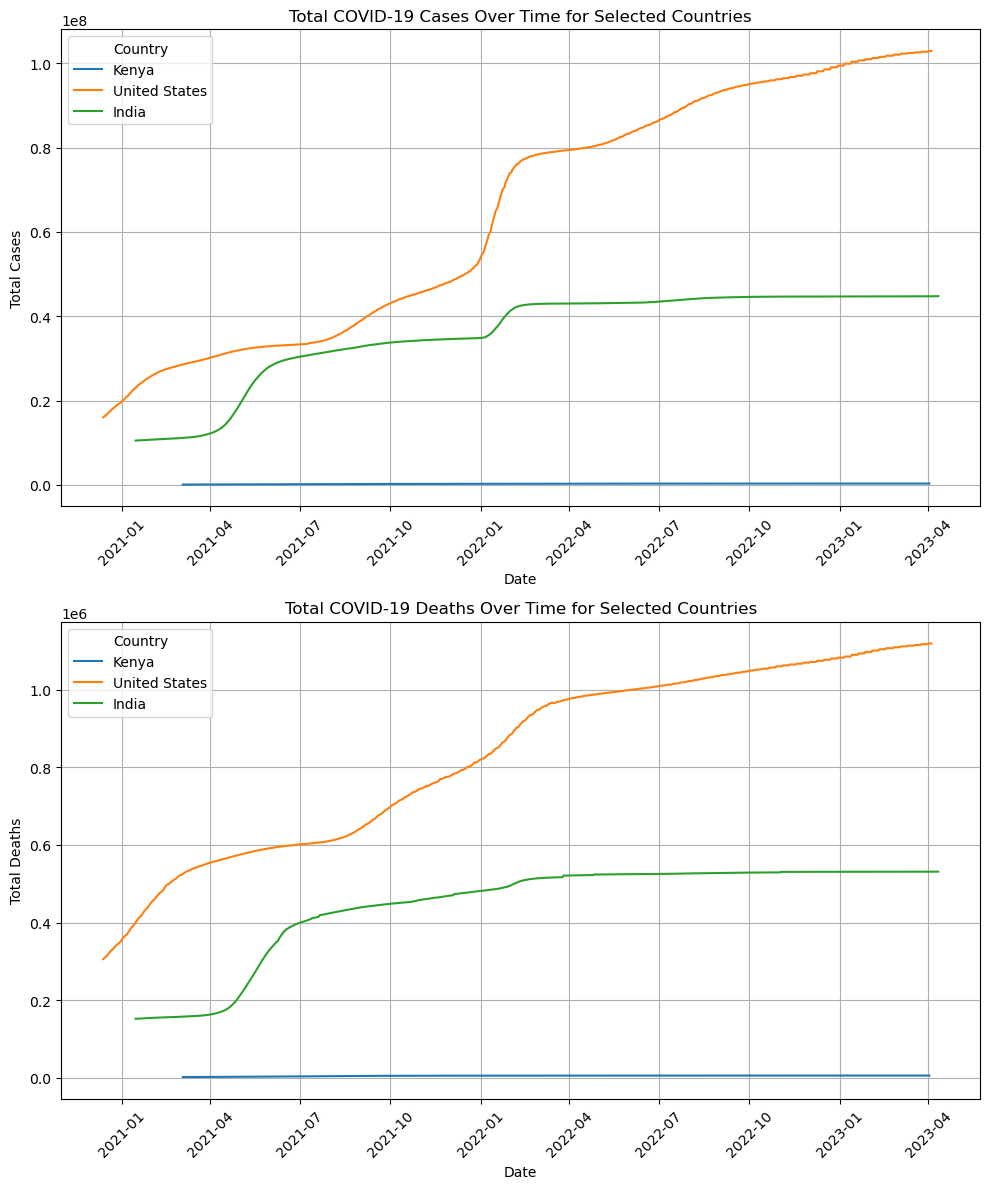

In [28]:
import matplotlib.pyplot as plt

# List of selected countries
selected_countries = ['Kenya', 'United States', 'India']

# Create a figure with two subplots (one for cases, one for deaths)
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot total cases over time
for country in selected_countries:
    country_data = covid_filtered[covid_filtered['location'] == country]
    ax[0].plot(country_data['date'], country_data['total_cases'], label=country)

# Customize the first plot (total cases)
ax[0].set_title('Total COVID-19 Cases Over Time for Selected Countries')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total Cases')
ax[0].legend(title='Country')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Plot total deaths over time
for country in selected_countries:
    country_data = covid_filtered[covid_filtered['location'] == country]
    ax[1].plot(country_data['date'], country_data['total_deaths'], label=country)

# Customize the second plot (total deaths)
ax[1].set_title('Total COVID-19 Deaths Over Time for Selected Countries')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total Deaths')
ax[1].legend(title='Country')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


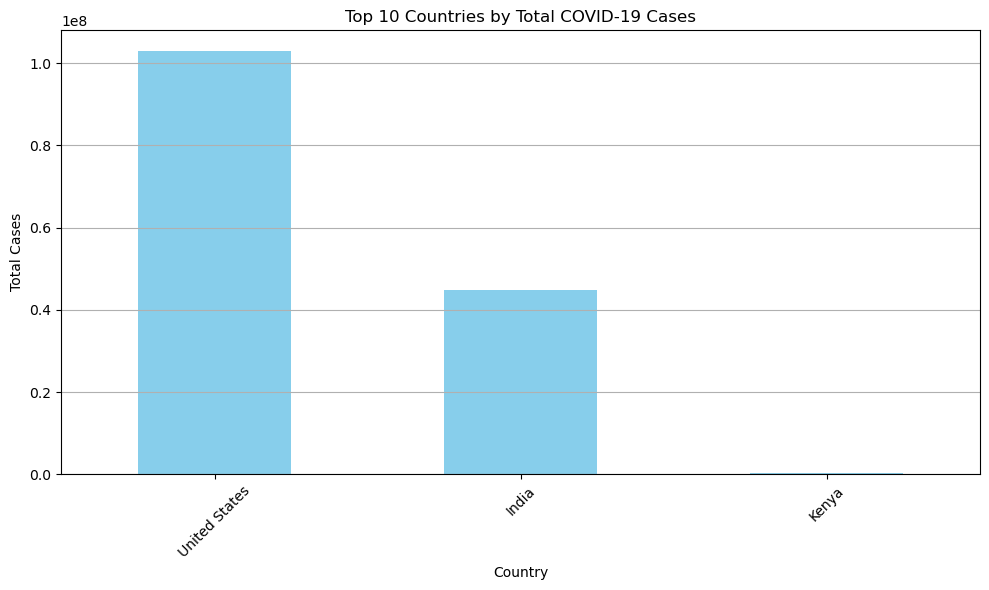

In [29]:
import matplotlib.pyplot as plt

# Group by 'location' and sum the total cases for each country
top_countries_cases = covid_filtered.groupby('location')['total_cases'].max().sort_values(ascending=False)

# Select the top N countries (e.g., top 10)
top_n = 10
top_countries_cases = top_countries_cases.head(top_n)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_countries_cases.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title(f'Top {top_n} Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Show plot
plt.tight_layout()
plt.show()


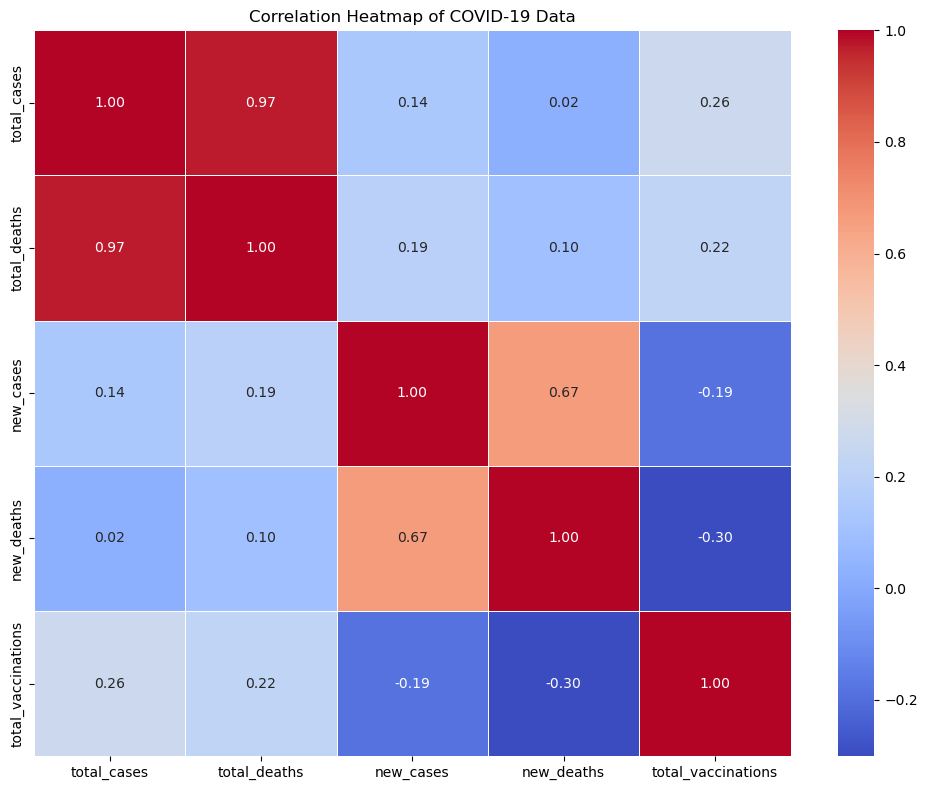

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']

# Compute the correlation matrix
correlation_matrix = covid_filtered[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of COVID-19 Data')
plt.tight_layout()
plt.show()


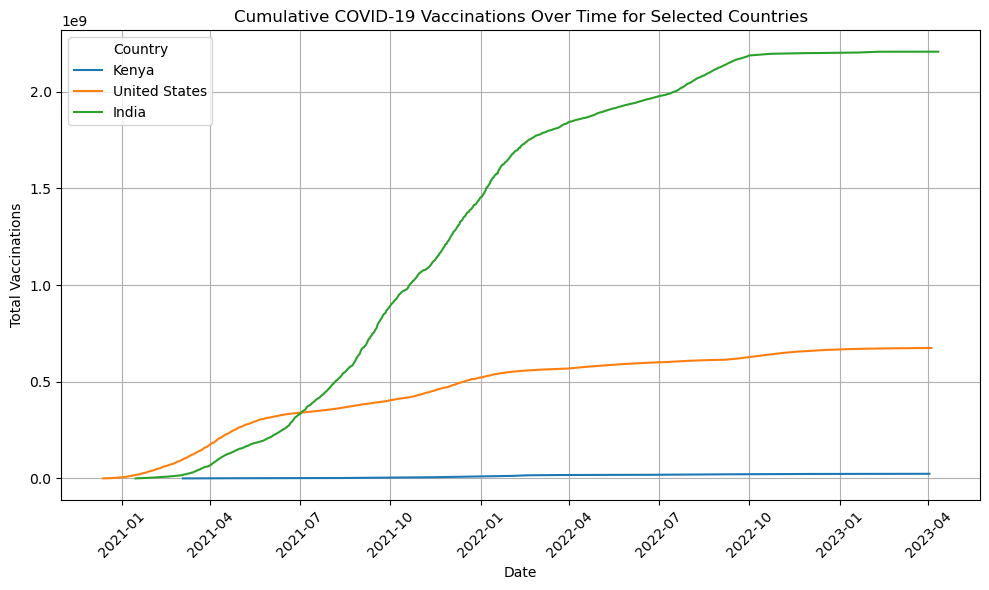

In [31]:
import matplotlib.pyplot as plt

# List of selected countries
selected_countries = ['Kenya', 'United States', 'India']

# Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = covid_filtered[covid_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

# Customize plot
plt.title('Cumulative COVID-19 Vaccinations Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [33]:
# Merge population data from 'covid' into 'covid_filtered' based on 'location'
covid_filtered = covid_filtered.merge(covid[['location', 'population']], on='location', how='left')

# Check if the population column is now in 'covid_filtered'
print(covid_filtered[['location', 'population']].head())

  location    population
0    India  1.417173e+09
1    India  1.417173e+09
2    India  1.417173e+09
3    India  1.417173e+09
4    India  1.417173e+09


In [34]:
# Display the first few rows of the merged dataset to verify
print(covid_filtered.head())


        date location  total_cases  total_deaths  new_cases  new_deaths  \
0 2021-01-15    India   10527683.0      151918.0    15590.0       191.0   
1 2021-01-15    India   10527683.0      151918.0    15590.0       191.0   
2 2021-01-15    India   10527683.0      151918.0    15590.0       191.0   
3 2021-01-15    India   10527683.0      151918.0    15590.0       191.0   
4 2021-01-15    India   10527683.0      151918.0    15590.0       191.0   

   total_vaccinations  death_rate    population  
0                 0.0     0.01443  1.417173e+09  
1                 0.0     0.01443  1.417173e+09  
2                 0.0     0.01443  1.417173e+09  
3                 0.0     0.01443  1.417173e+09  
4                 0.0     0.01443  1.417173e+09  


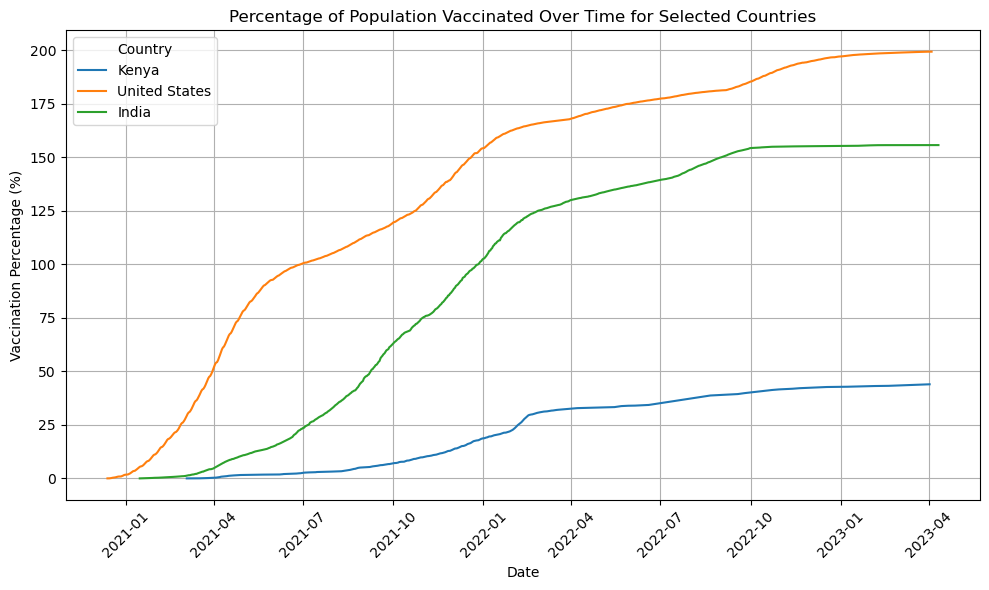

In [36]:
import matplotlib.pyplot as plt

# List of selected countries
selected_countries = ['Kenya', 'United States', 'India']

# Plot % vaccinated population over time for selected countries,
plt.figure(figsize=(10, 6))

for country in selected_countries:
    # Filter data for the current country
    country_data = covid_filtered[covid_filtered['location'] == country].copy()  # Create a copy to avoid SettingWithCopyWarning
    
    # Calculate the vaccination percentage
    country_data.loc[:, 'vaccination_percentage'] = (country_data['total_vaccinations'] / country_data['population']) * 100
    
    # Plot the vaccination percentage
    plt.plot(country_data['date'], country_data['vaccination_percentage'], label=country)

# Customize plot
plt.title('Percentage of Population Vaccinated Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Vaccination Percentage (%)')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


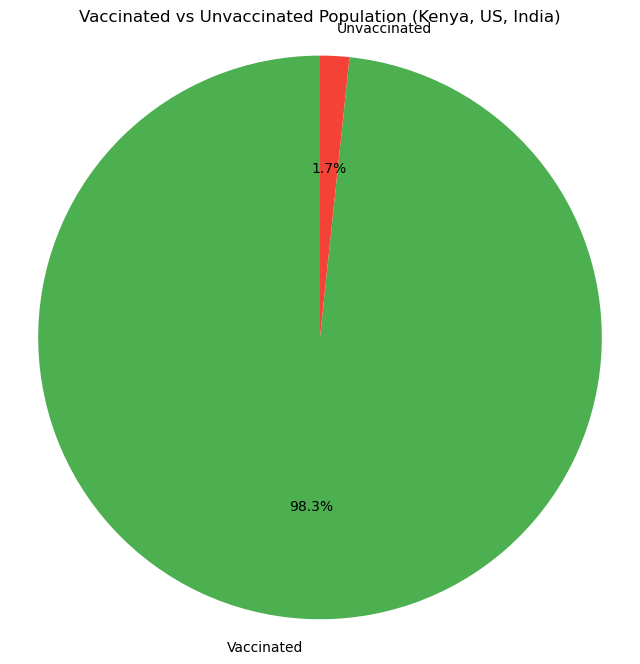

In [39]:
import matplotlib.pyplot as plt

# List of selected countries
selected_countries = ['Kenya', 'United States', 'India']

# Filter data for selected countries and get latest date entries
latest_data = covid_filtered[covid_filtered['location'].isin(selected_countries)].copy()
latest_data = latest_data.sort_values('date').groupby('location').tail(1)

# Calculate total vaccinated and total population across selected countries
total_vaccinated = latest_data['total_vaccinations'].clip(upper=latest_data['population']).sum()
total_population = latest_data['population'].sum()
total_unvaccinated = total_population - total_vaccinated

# Pie chart data
pie_data = [total_vaccinated, total_unvaccinated]
labels = ['Vaccinated', 'Unvaccinated']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Vaccinated vs Unvaccinated Population (Kenya, US, India)')
plt.axis('equal')  # Equal aspect ratio for circle
plt.show()

